# pyStrat_draft

This notebook is a draft/testing stage for pyStrat.

## Import Modules

Core:

In [1]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import pandas as pd
import numpy as np
% matplotlib inline

pyStrat:

In [2]:
from pyStrat import read_data
from pyStrat import read_formatting
from pyStrat import integrity_check
from pyStrat import plot_stratigraphy

## Import Data and Formatting

In [3]:
data = read_data('data_template.csv')
formatting = read_formatting('formatting_template.csv')

## Integrity Check

In [4]:
integrity_check(data, formatting)

Colour and width check passed.


## Plot

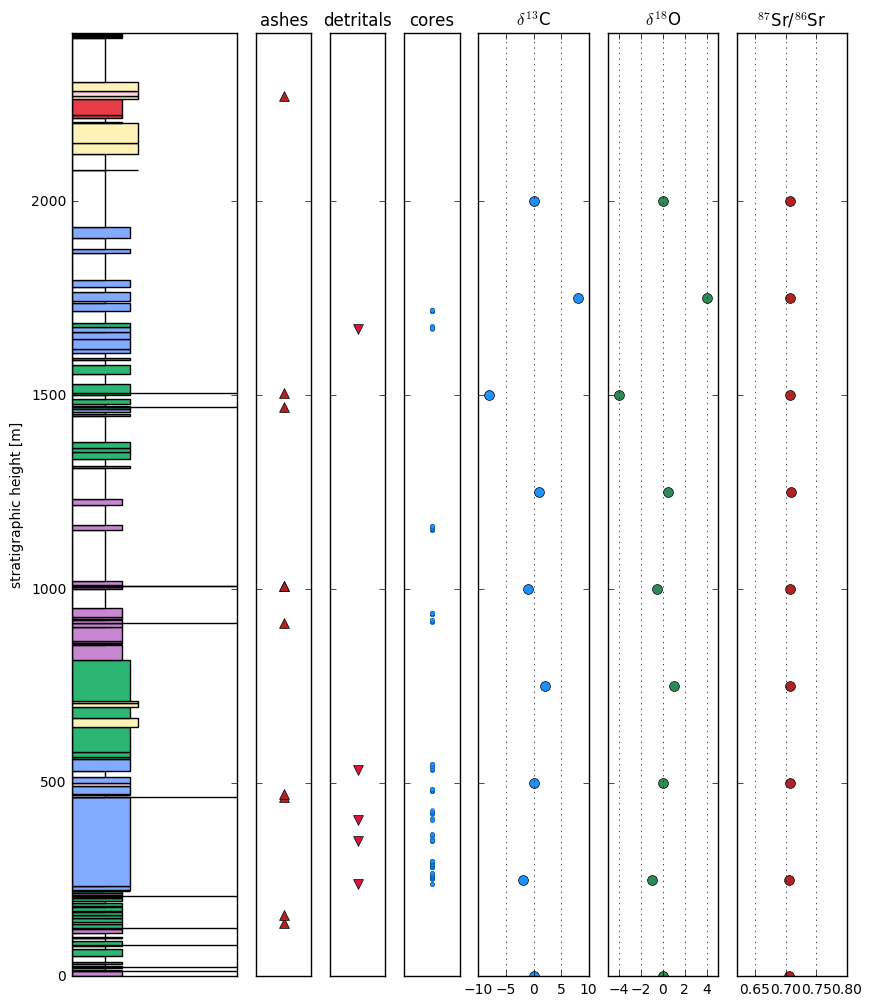

In [5]:
fig, axs = plot_stratigraphy(data, formatting, 0.005)
plt.show(fig)